In [1]:
import logging

import numpy as np
import matplotlib.pyplot as plt

from src.QM7Dataset import load_QM7, QM7Data

In [2]:
_, _, q = load_QM7(fp='/local/meliao/projects/invariant-random-features/data/qm7/qm7.mat',
                  n_train=0,
                  n_test=7_165,
                  permute_samples=False)

In [3]:
q.n_atoms.shape

(7165,)

In [4]:
q.n_atoms[:5]

array([5, 8, 6, 4, 9])

In [5]:
q.charges[:5]

array([[6., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [6., 6., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [6., 6., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [6., 6., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [6., 6., 8., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [6]:
q.align_coords()

In [64]:
np.unique(q.charges)

array([ 0.,  1.,  6.,  7.,  8., 16.], dtype=float32)

# Look at ratio of point cloud singular values

In [7]:
singular_vals = np.zeros((q.n_samples, 3))

In [8]:
for i in range(q.n_samples):
    n_atoms_i = q.n_atoms[i]
    coords_i = q.coords[i, :n_atoms_i].T
    
    s = np.linalg.svd(coords_i, compute_uv=False)
    singular_vals[i] = s

In [9]:
sing_val_ratios_1_0 = singular_vals[:, 1].flatten() / singular_vals[:, 0].flatten()
sing_val_ratios_2_1 = singular_vals[:, 2].flatten() / singular_vals[:, 1].flatten()

/tmp/ipykernel_212680/3862964891.py:2: RuntimeWarning: invalid value encountered in true_divide
  sing_val_ratios_2_1 = singular_vals[:, 2].flatten() / singular_vals[:, 1].flatten()


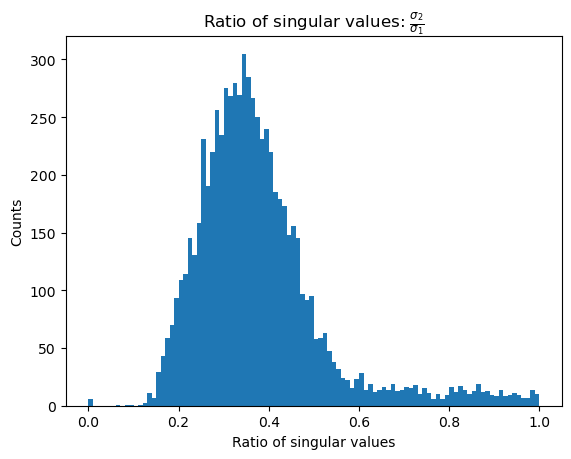

In [62]:
fig, ax = plt.subplots()

fig.patch.set_facecolor('white')
yvals = np.sort(sing_val_ratios_1_0)
ax.hist(yvals, 100)
ax.set_ylabel('Counts')
ax.set_title('Ratio of singular values: $\\frac{\\sigma_2}{\\sigma_1}$')
ax.set_xlabel('Ratio of singular values')
# ax.set_yscale('log')
# ax.grid(which='both')
plt.savefig('/local/meliao/notes/CMSC-35430-Homework/final_project/figures/singular_vals_1_2.pdf')

plt.show()

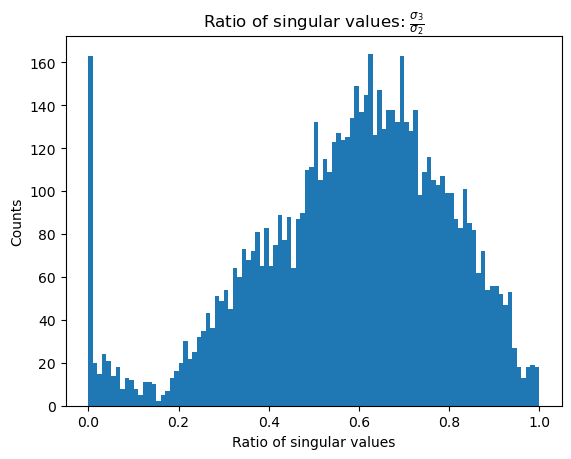

In [63]:
fig, ax = plt.subplots()

fig.patch.set_facecolor('white')
yvals = np.sort(sing_val_ratios_2_1)
ax.hist(yvals, 100)
ax.set_ylabel('Counts')
ax.set_title('Ratio of singular values: $\\frac{\\sigma_3}{\\sigma_2}$')
ax.set_xlabel('Ratio of singular values')
# ax.set_yscale('log')

plt.savefig('/local/meliao/notes/CMSC-35430-Homework/final_project/figures/singular_vals_2_3.pdf')

plt.show()

# Plot Molecules with high sigma_2 / sigma_1 ratios

In [47]:
def _plot(points: np.ndarray,
         charges: np.ndarray,
         singular_vectors: np.ndarray=None,
         ax=None) -> None:
    """ plots a molecule in given ax.
    """
    colors_dd = {1: 'grey',
                 6: 'black',
                 7: 'blue',
                 8: 'red',
                 16: 'yellow'}
    names_dd = {1: 'Hydrogen',
                6: 'Carbon',
                7: 'Nitrogen',
                8: 'Oxygen',
                16: 'Sulfur'}
    for charge in np.unique(charges):
        if charge == 0:
            continue
        points_i = points[charges == charge]
        color_i = colors_dd[charge]
        name_i = names_dd[charge]
        size_i = (charge ** 3) + 60
        ax.scatter(points_i[:, 0], 
                    points_i[:, 1], 
                    points_i[:, 2], 
                    color=color_i, 
                    label=name_i, 
                    s=size_i, 
                    depthshade=False)
        
    if singular_vectors is not None:
        for i in range(3):
            ax.plot([0, singular_vectors[i, 0]], 
                        [0, singular_vectors[i, 1]],
                        [0, singular_vectors[i, 2]], 
                        '-', label=f'PC {i+1}')



def plot_molecule(points: np.ndarray, 
                  charges: np.ndarray, 
                  singular_vectors: np.ndarray=None, 
                  elev: float=None,
                  azim: float=None,
                  fp: str=None) -> None:
    """
    Plots in 3D
    """

    
    # bool_arr = charges != 0
    # charges_p = charges[bool_arr]
    # points_p = points[bool_arr]
    
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    fig.set_size_inches(15, 7)
    ax1 = fig.add_subplot(121, projection="3d")
    _plot(points, charges, singular_vectors, ax1)
    ax1.view_init(elev=30, azim=30)
    ax1.legend()
    
    ax2 = fig.add_subplot(122, projection='3d')
    _plot(points, charges, singular_vectors, ax2)
    ax2.view_init(elev=60, azim=60)
    
    plt.savefig(fp)
    plt.show()
    plt.clf()
    


In [48]:
sing_val_ratios_1_0[np.argsort(sing_val_ratios_1_0)[-5:]]

array([0.99971628, 0.99983887, 0.99989814, 0.9999458 , 0.99997912])

In [55]:
idxes = np.argsort(sing_val_ratios_1_0)[-5:]
print(idxes)

[128  26   7 660 371]


NOTE: using the aligned axis and then azim=elev=30 + azim=elev=60 works well.

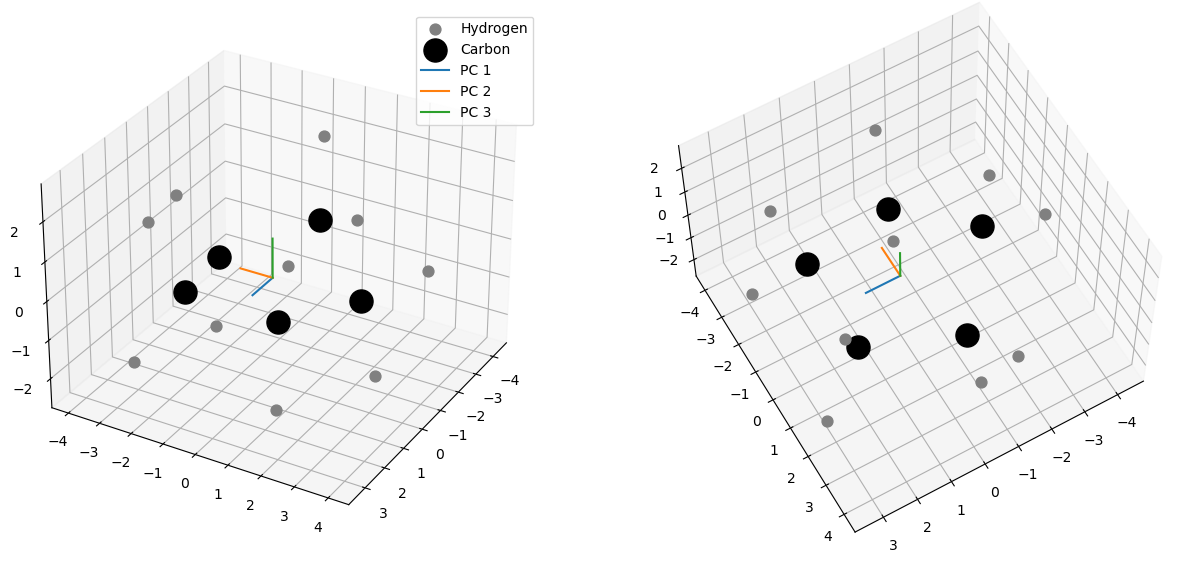

<Figure size 640x480 with 0 Axes>

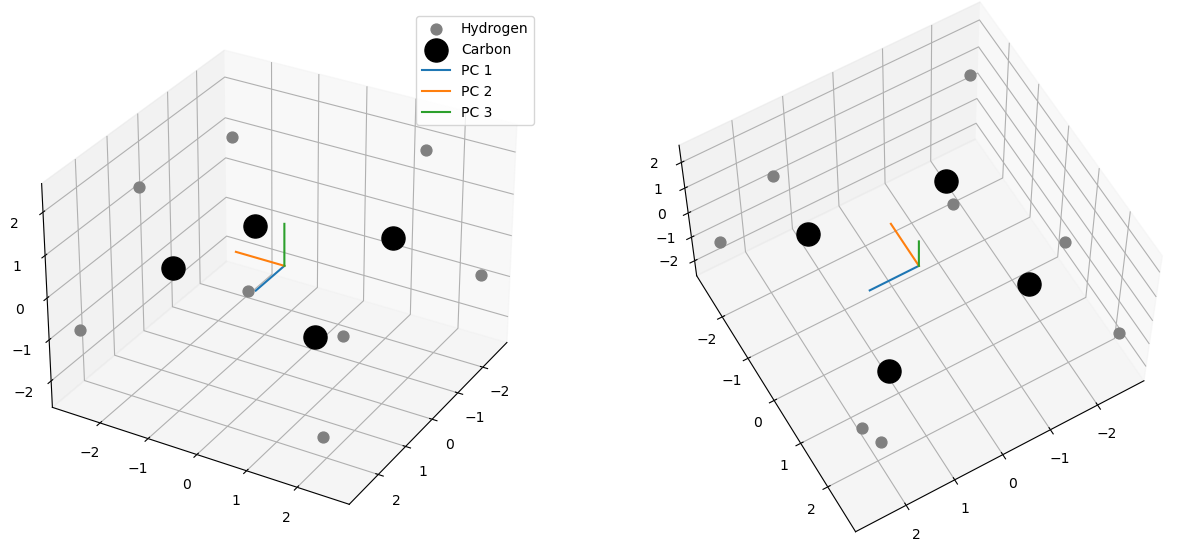

<Figure size 640x480 with 0 Axes>

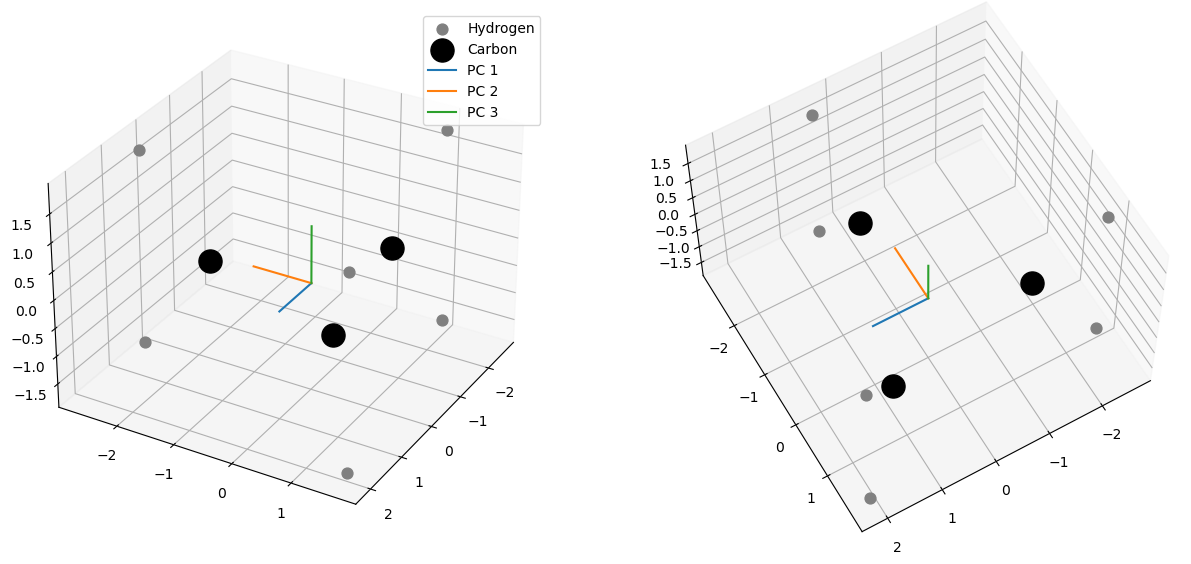

<Figure size 640x480 with 0 Axes>

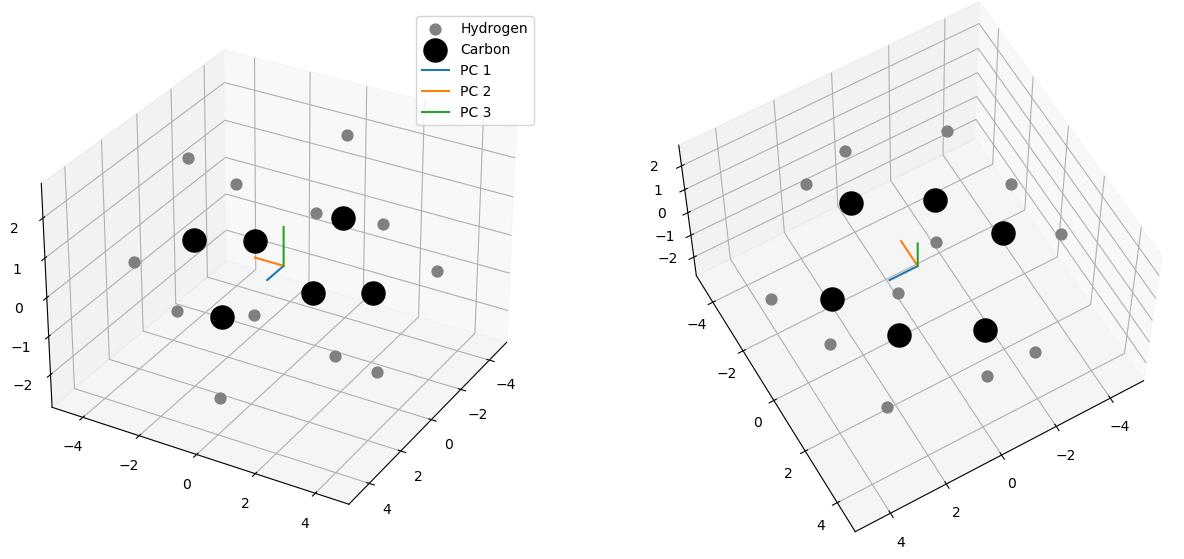

<Figure size 640x480 with 0 Axes>

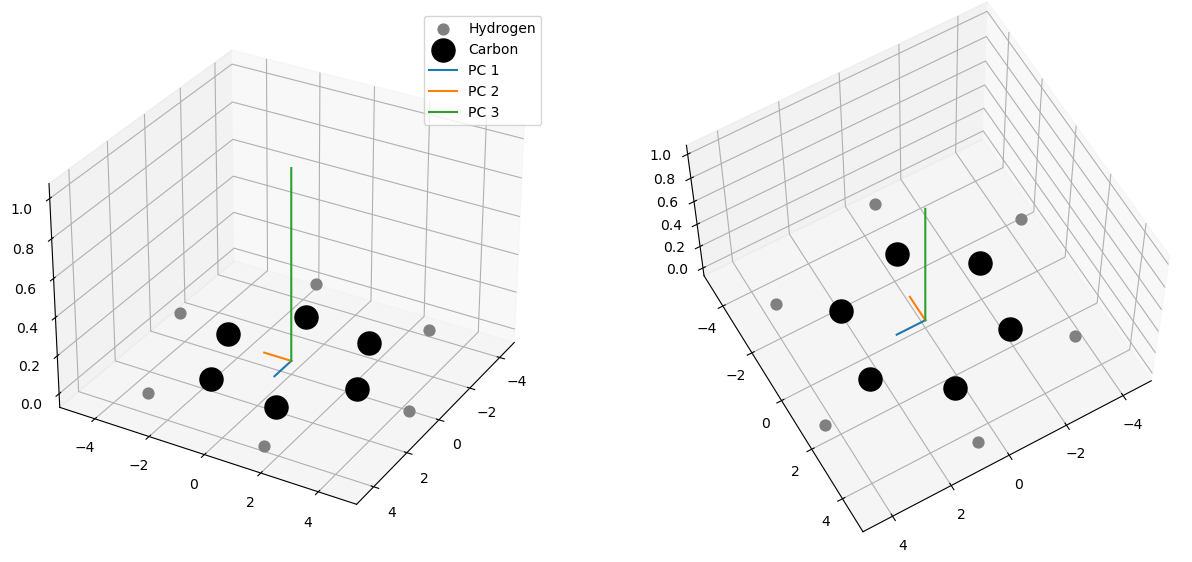

<Figure size 640x480 with 0 Axes>

In [50]:
for i in idxes:
    n_atoms_i = q.n_atoms[i]
    coords_i = q.aligned_coords[i, :n_atoms_i]
    charges_i = q.charges[i, :n_atoms_i]

    u, s, v_t = np.linalg.svd(coords_i.T)
    fp_out = f"/local/meliao/notes/CMSC-35430-Homework/final_project/figures/mols_with_approx_equal_pc1_pc2/molecule_{i}.pdf"
    plot_molecule(coords_i, charges_i, singular_vectors=u, fp=fp_out)

In [51]:
sing_val_ratios_2_1[np.argsort(sing_val_ratios_2_1)[-13:]]

array([0.99981235, 0.9999717 , 0.99998619, 0.99999293, 0.99999384,
       0.99999814, 0.99999882,        nan,        nan,        nan,
              nan,        nan,        nan])

In [56]:
idxes = np.argsort(sing_val_ratios_2_1)[-11:-6]
print(idxes)

[  13 1026 7150   16  194]


In [53]:
sing_val_ratios_2_1[idxes]

array([0.99998619, 0.99999293, 0.99999384, 0.99999814, 0.99999882])

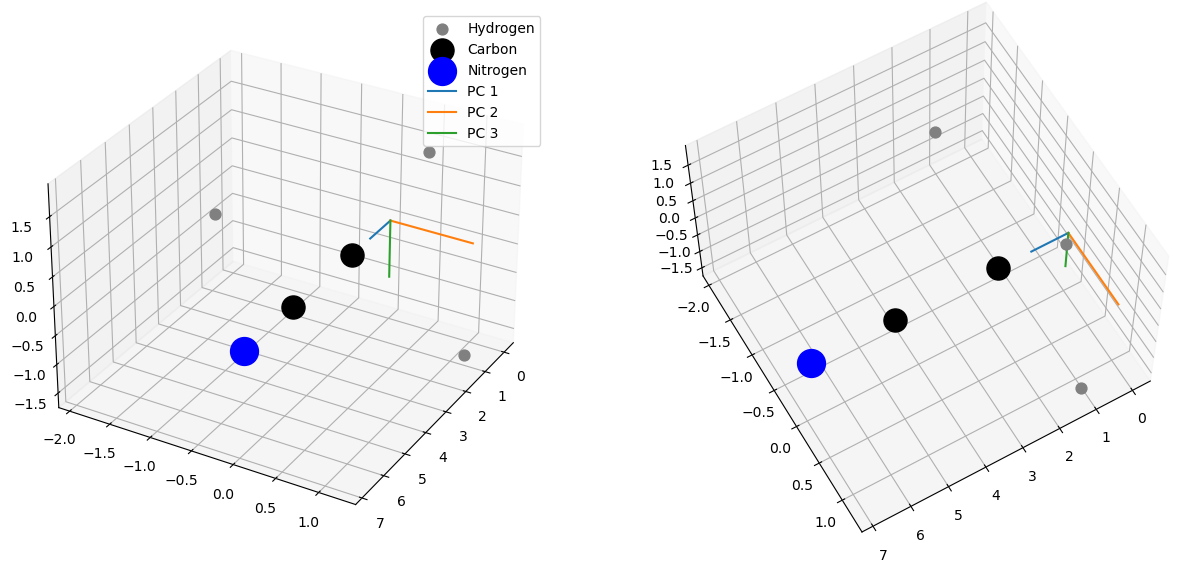

<Figure size 640x480 with 0 Axes>

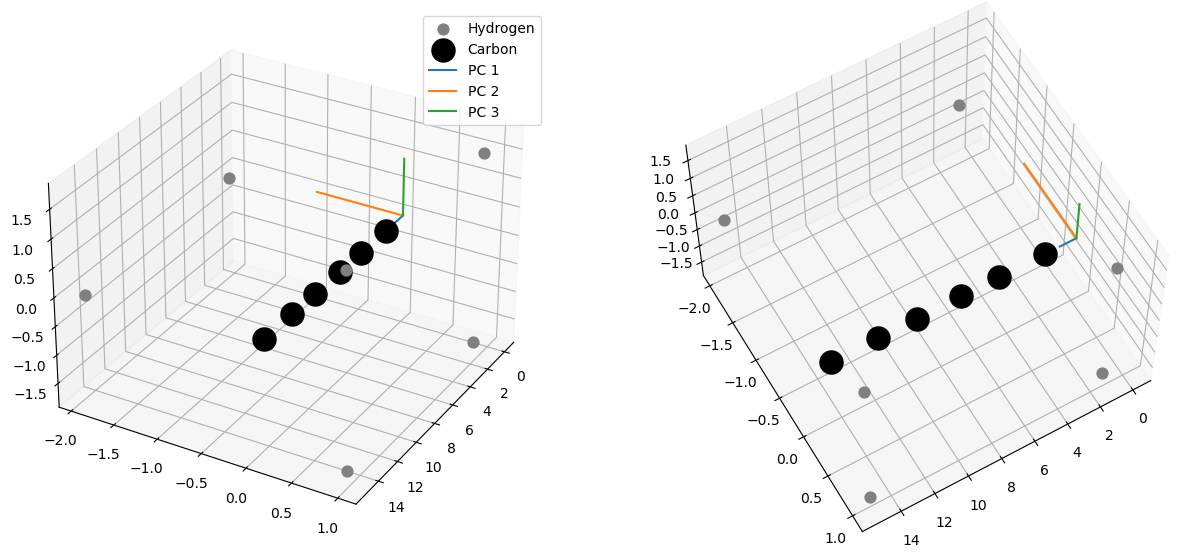

<Figure size 640x480 with 0 Axes>

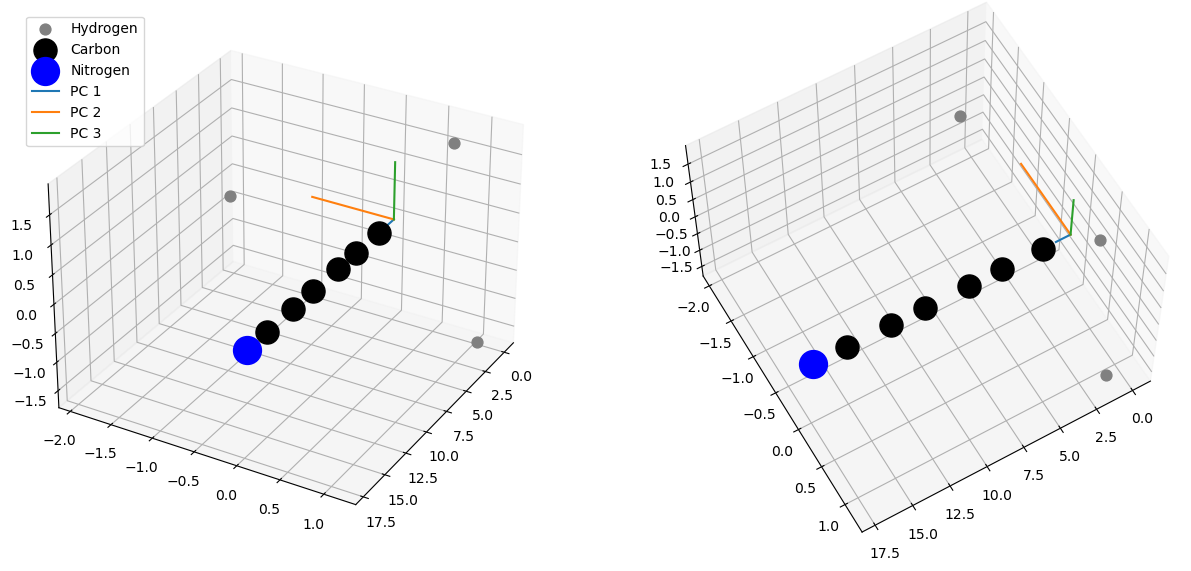

<Figure size 640x480 with 0 Axes>

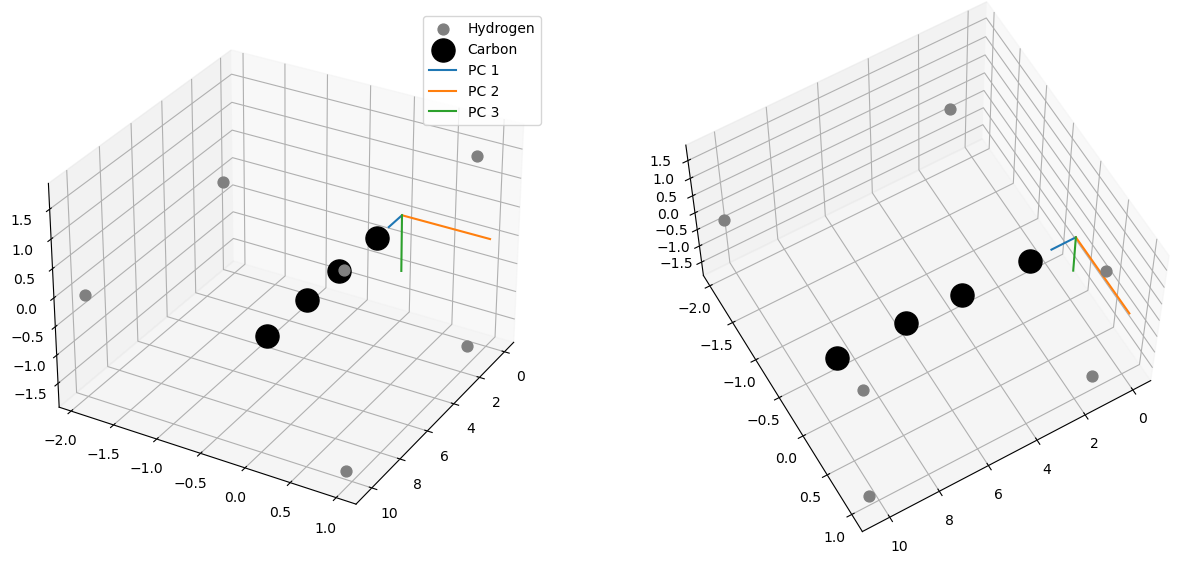

<Figure size 640x480 with 0 Axes>

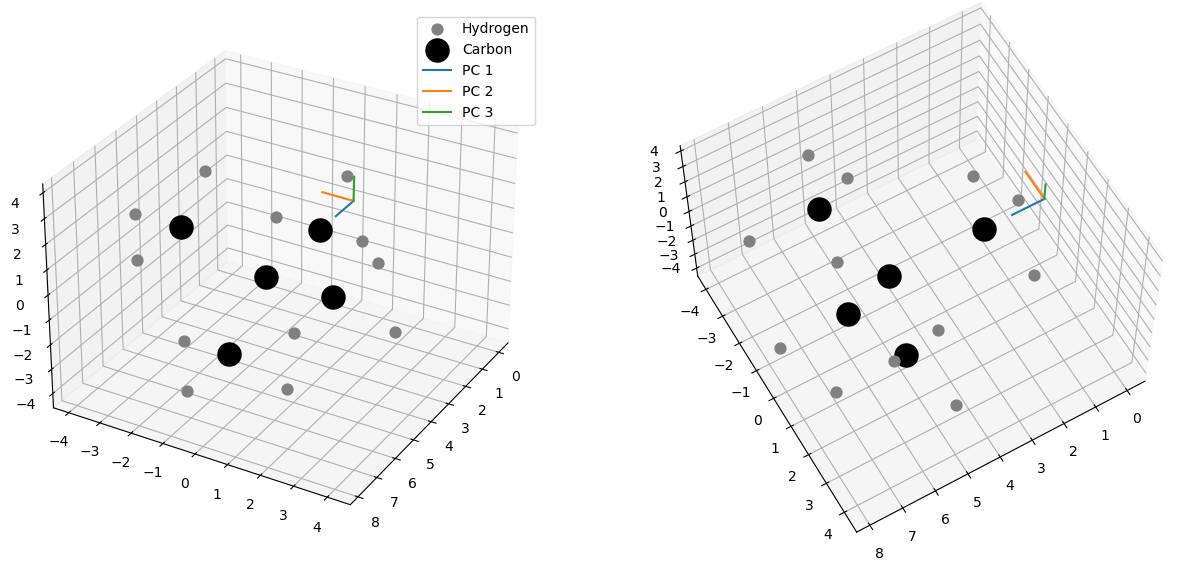

<Figure size 640x480 with 0 Axes>

In [54]:
for i in idxes:
    n_atoms_i = q.n_atoms[i]
    coords_i = q.aligned_coords[i, :n_atoms_i]
    charges_i = q.charges[i, :n_atoms_i]

    u, s, v_t = np.linalg.svd(coords_i.T)
    fp_out = f"/local/meliao/notes/CMSC-35430-Homework/final_project/figures/mols_with_approx_equal_pc2_pc3/molecule_{i}.pdf"
    plot_molecule(coords_i, charges_i, singular_vectors=u, fp=fp_out)

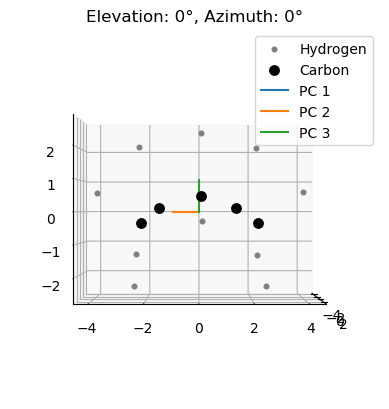

<Figure size 640x480 with 0 Axes>

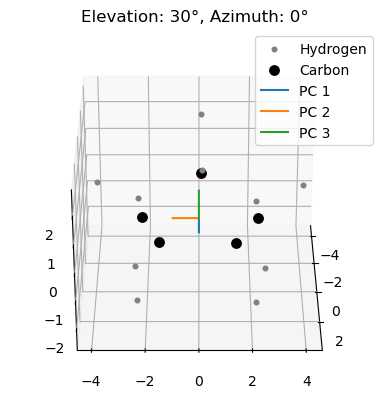

<Figure size 640x480 with 0 Axes>

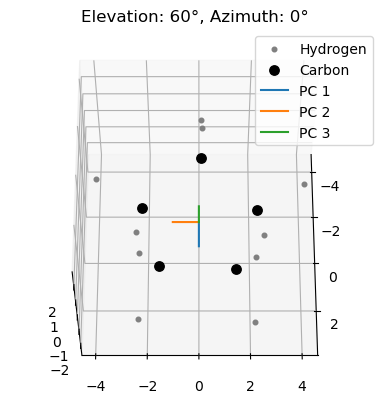

<Figure size 640x480 with 0 Axes>

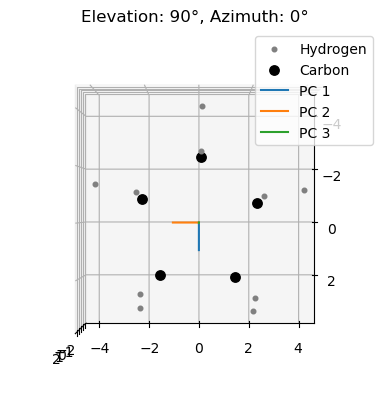

<Figure size 640x480 with 0 Axes>

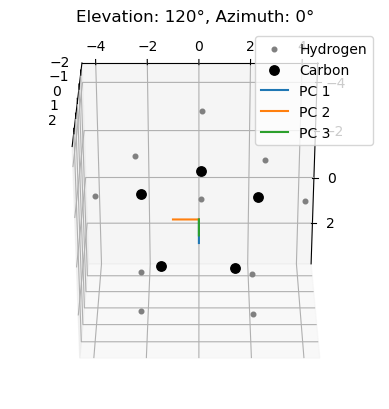

<Figure size 640x480 with 0 Axes>

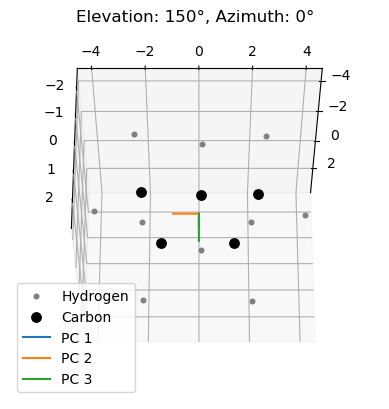

<Figure size 640x480 with 0 Axes>

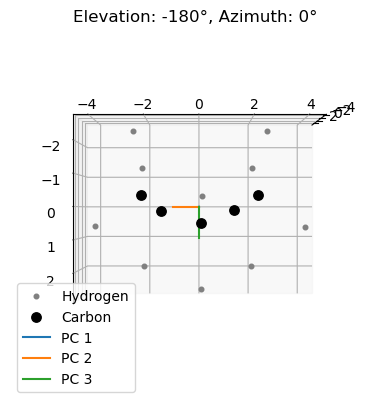

<Figure size 640x480 with 0 Axes>

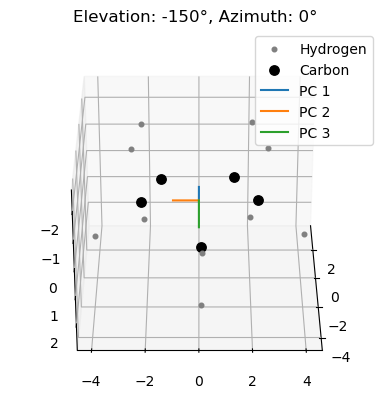

<Figure size 640x480 with 0 Axes>

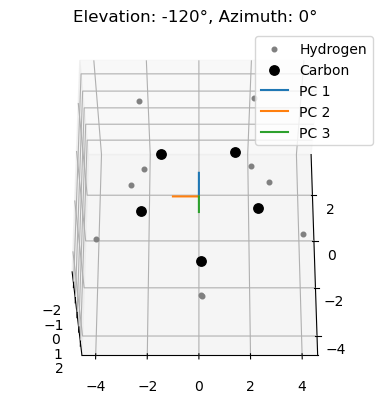

<Figure size 640x480 with 0 Axes>

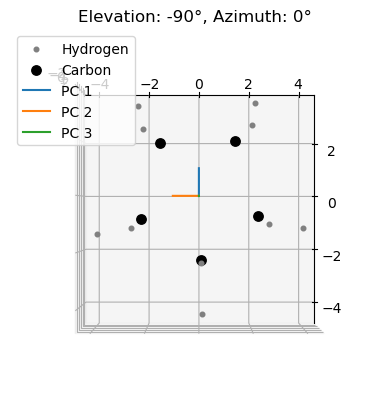

<Figure size 640x480 with 0 Axes>

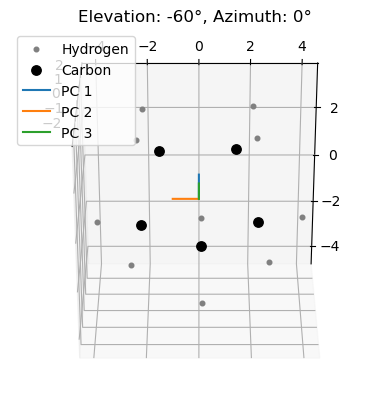

<Figure size 640x480 with 0 Axes>

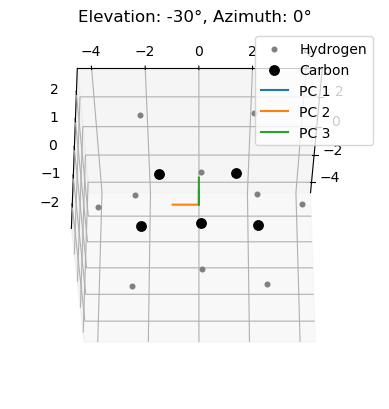

<Figure size 640x480 with 0 Axes>

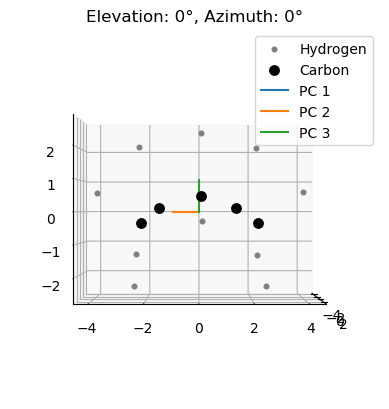

<Figure size 640x480 with 0 Axes>

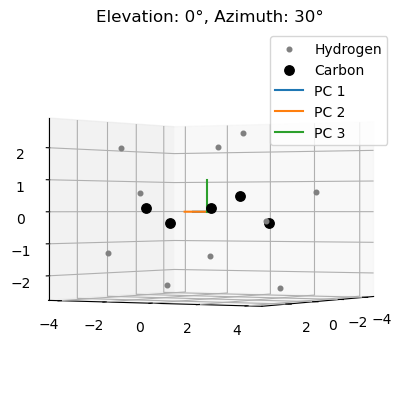

<Figure size 640x480 with 0 Axes>

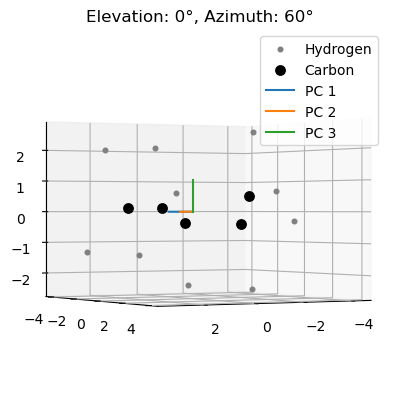

<Figure size 640x480 with 0 Axes>

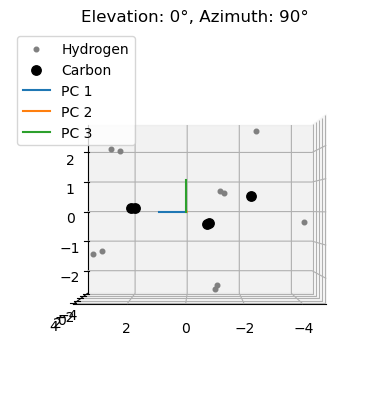

<Figure size 640x480 with 0 Axes>

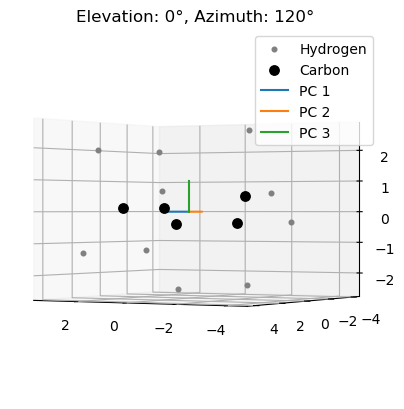

<Figure size 640x480 with 0 Axes>

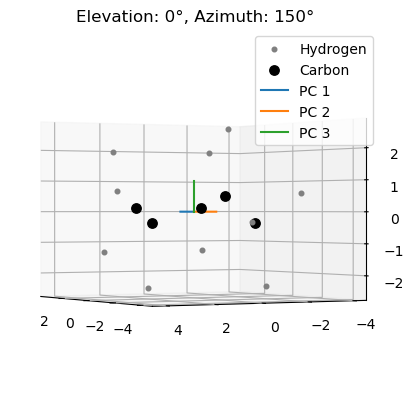

<Figure size 640x480 with 0 Axes>

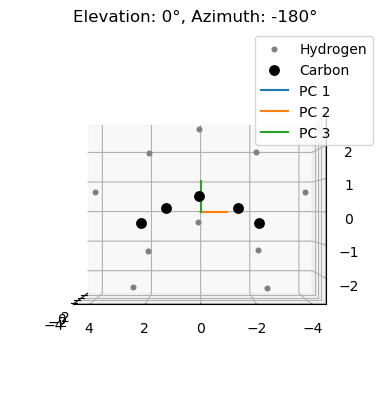

<Figure size 640x480 with 0 Axes>

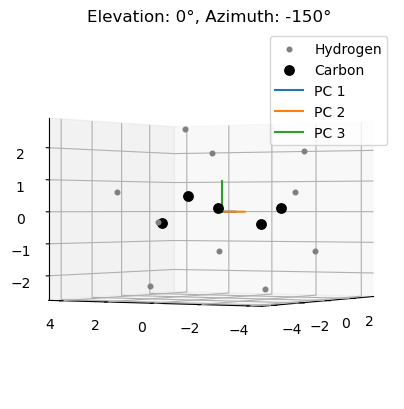

<Figure size 640x480 with 0 Axes>

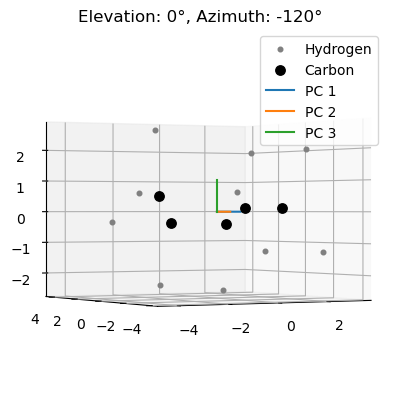

<Figure size 640x480 with 0 Axes>

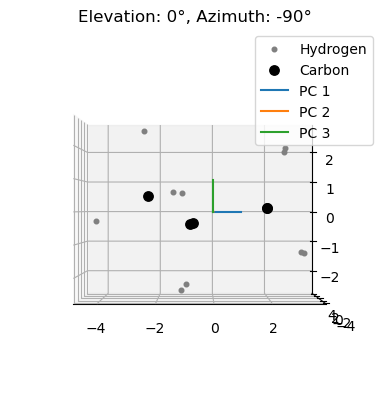

<Figure size 640x480 with 0 Axes>

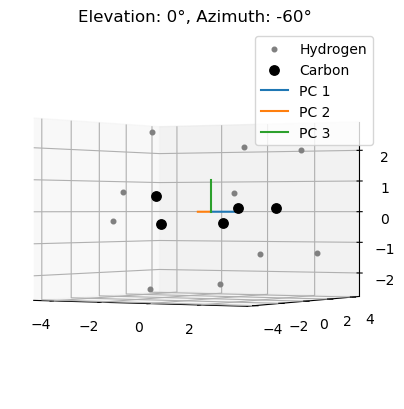

<Figure size 640x480 with 0 Axes>

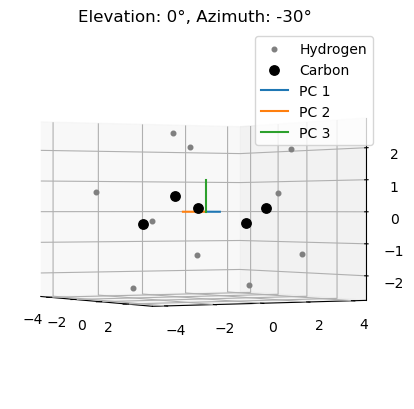

<Figure size 640x480 with 0 Axes>

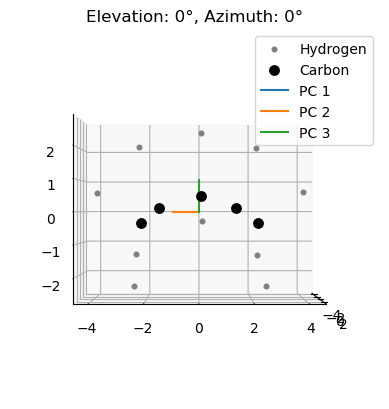

<Figure size 640x480 with 0 Axes>

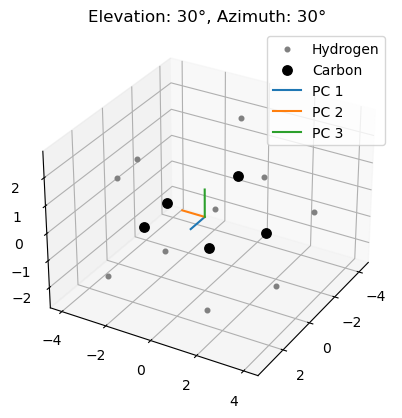

<Figure size 640x480 with 0 Axes>

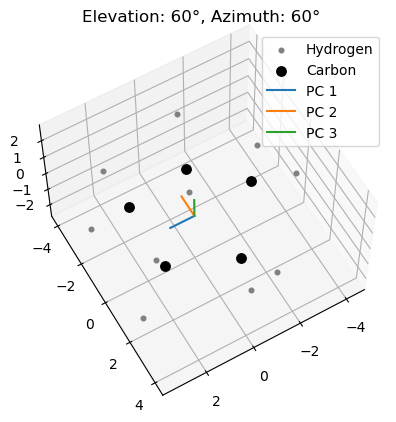

<Figure size 640x480 with 0 Axes>

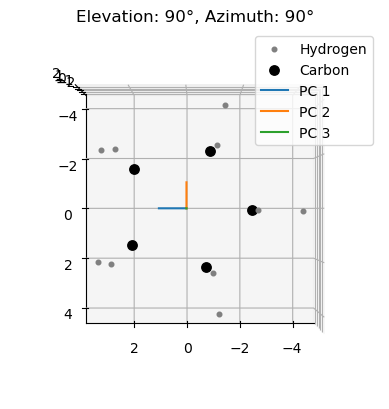

<Figure size 640x480 with 0 Axes>

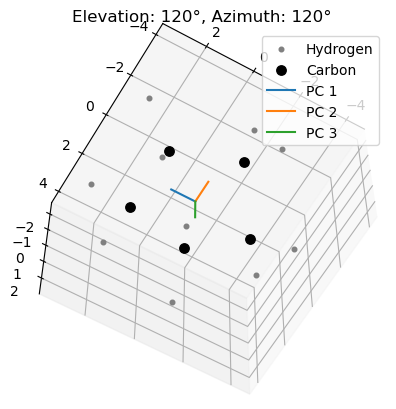

<Figure size 640x480 with 0 Axes>

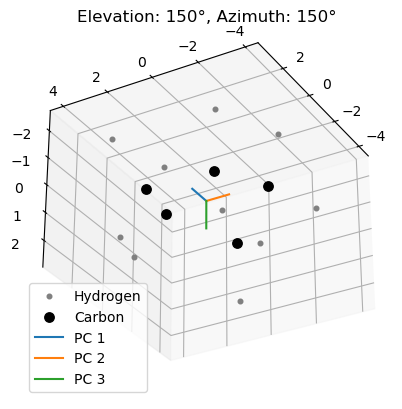

<Figure size 640x480 with 0 Axes>

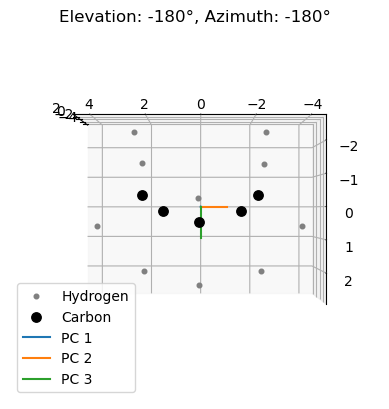

<Figure size 640x480 with 0 Axes>

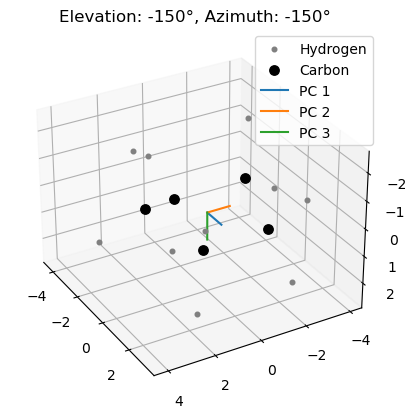

<Figure size 640x480 with 0 Axes>

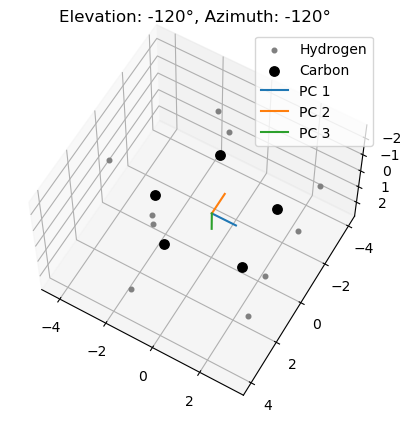

<Figure size 640x480 with 0 Axes>

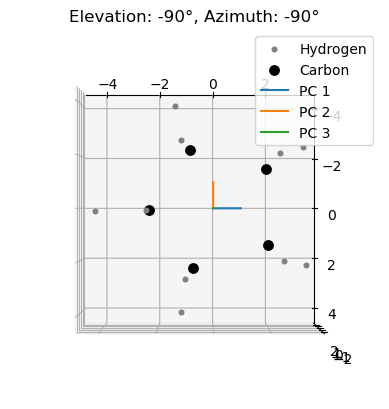

<Figure size 640x480 with 0 Axes>

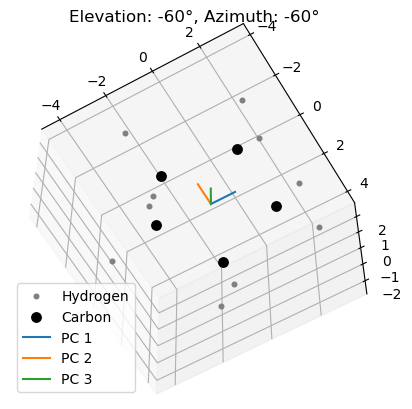

<Figure size 640x480 with 0 Axes>

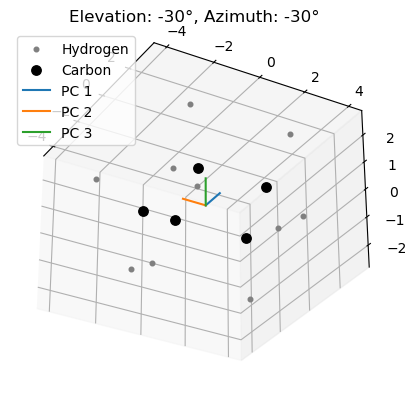

<Figure size 640x480 with 0 Axes>

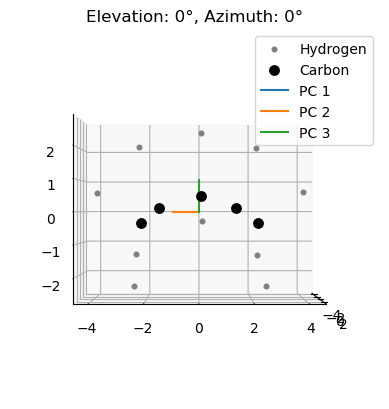

<Figure size 640x480 with 0 Axes>

In [92]:
i = 5075
n_atoms_i = q.n_atoms[i]
coords_i = q.aligned_coords[i, :n_atoms_i]
charges_i = q.charges[i, :n_atoms_i]

u, s, v_t = np.linalg.svd(coords_i.T)
for angle in range(0, 360*3 + 1, 30):
    # Normalize the angle to the range [-180, 180] for display
    angle_norm = (angle + 180) % 360 - 180

    # Cycle through a full rotation of elevation, then azimuth, roll, and all
    elev = azim = roll = 0
    if angle <= 360:
        elev = angle_norm
    elif angle <= 360*2:
        azim = angle_norm
    else:
        elev = azim = roll = angle_norm

    # Update the axis view and title




    plot_molecule(coords_i, charges_i, singular_vectors=u, elev=elev, azim=azim)